## **Principal Component Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Breast_cancer_dataset.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)

In [5]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df.shape

(569, 31)

In [7]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis'].map({'B': 0, 'M': 1})

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=12345, 
                                                    stratify=y)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 12345)
dt_model.fit(X_train_sc,y_train)
y_predict = dt_model.predict(X_test_sc)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred = y_predict,y_true = y_test)
print(accuracy)

0.9298245614035088


In [11]:
from sklearn.decomposition import PCA
sk_pca = PCA()
sk_pca.fit(X_train_sc)

PCA()

In [12]:
sk_pca.explained_variance_ratio_, sk_pca.n_components_

(array([4.38205618e-01, 1.99630596e-01, 8.80652625e-02, 6.89861543e-02,
        5.57617716e-02, 4.09248150e-02, 2.18301215e-02, 1.56033063e-02,
        1.26484690e-02, 1.15952531e-02, 9.81173634e-03, 8.20231492e-03,
        7.62143223e-03, 5.22516126e-03, 3.37814713e-03, 2.70864853e-03,
        1.90135710e-03, 1.54682658e-03, 1.34902700e-03, 1.00842901e-03,
        9.22863387e-04, 8.69387645e-04, 6.33996883e-04, 5.62167783e-04,
        4.48650462e-04, 2.54489192e-04, 2.30690789e-04, 4.37700848e-05,
        2.50423300e-05, 4.49333013e-06]),
 30)

In [13]:
np.cumsum(sk_pca.explained_variance_ratio_)

array([0.43820562, 0.63783621, 0.72590148, 0.79488763, 0.8506494 ,
       0.89157422, 0.91340434, 0.92900765, 0.94165611, 0.95325137,
       0.9630631 , 0.97126542, 0.97888685, 0.98411201, 0.98749016,
       0.99019881, 0.99210017, 0.99364699, 0.99499602, 0.99600445,
       0.99692731, 0.9977967 , 0.9984307 , 0.99899286, 0.99944151,
       0.999696  , 0.99992669, 0.99997046, 0.99999551, 1.        ])

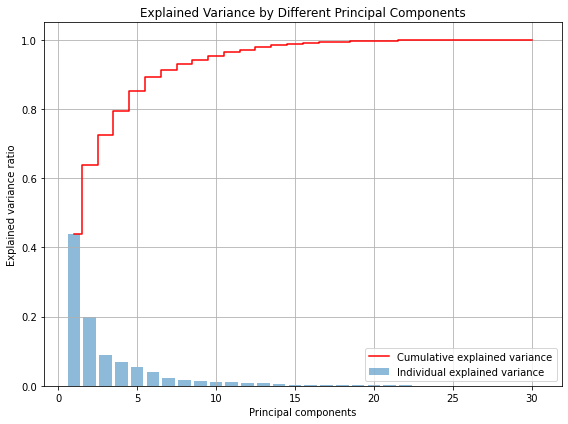

In [14]:
explained_variance = sk_pca.explained_variance_ratio_


plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid',
         label='Cumulative explained variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Different Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.grid()
plt.show()

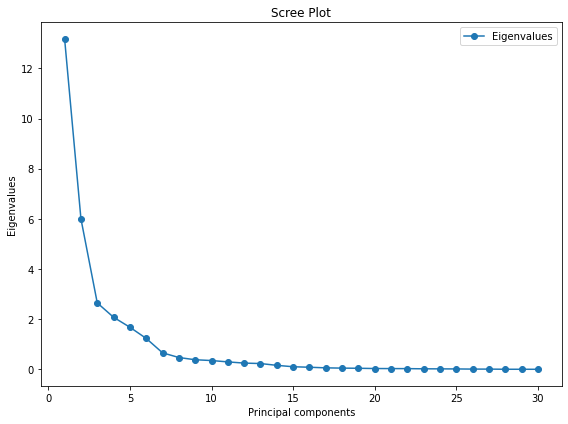

In [15]:
eigenvalues = sk_pca.explained_variance_

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', label='Eigenvalues')
plt.xlabel('Principal components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [16]:
pca = PCA(n_components=0.95)
pca.fit(X_train_sc)

PCA(n_components=0.95)

In [17]:
X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [18]:
X_train_pca.shape

(455, 10)

In [19]:
X_train_pca[0:5,:]

array([[-0.31553743,  2.34135162,  0.61358956,  0.39047853,  0.23775783,
         0.77330118, -0.89829965, -0.58544301,  0.15239576, -0.09169843],
       [ 2.89576186,  3.3602044 , -0.65411187,  1.36838869, -1.58017211,
        -0.42008454,  0.23261603, -0.02845563, -0.10762681,  0.92729529],
       [ 2.94444869,  1.14384135, -2.07671295, -2.78255947, -0.33342992,
        -0.45087101, -0.47265414,  1.02589619, -0.04935014, -0.52575908],
       [ 8.94107259, -0.84622378,  0.99877792, -0.43836391,  0.56285274,
        -0.42687506, -0.06367536,  0.77401963,  0.86295035,  0.21734457],
       [ 0.82131241,  0.89822881, -2.72744446,  0.09833266,  0.59977847,
        -1.12175552, -0.16938407, -0.21307355,  0.49057011, -0.64189987]])

In [20]:
dt_pca = DecisionTreeClassifier(random_state=12345)
dt_pca.fit(X_train_pca,y_train)
y_predict = dt_pca.predict(X_test_pca)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_predict,y_test)
print(accuracy)

0.9473684210526315


## **Linear Discriminant Analysis**

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train_lda = lda.fit_transform(X_train_sc, y_train)
X_test_lda = lda.transform(X_test_sc)

In [23]:
lda.coef_.shape

(1, 30)

In [24]:
X_train_lda.shape

(455, 1)

In [25]:
X_train_lda[0:5,:]

array([[-0.96709731],
       [ 1.7209997 ],
       [ 2.03991259],
       [ 3.56934213],
       [ 1.18609428]])

In [26]:
dt_lda = DecisionTreeClassifier(random_state = 12345)
dt_lda.fit(X_train_lda, y_train)

DecisionTreeClassifier(random_state=12345)

In [27]:
accuracy_score(y_true = y_test, y_pred = dt_lda.predict(X_test_lda))

0.9473684210526315

## **t-Distributed Stochastic Neighbor Embedding (t-SNE)**

In [28]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=12345, n_iter=1000)
X_tsne = model.fit_transform(X_train_sc)

In [29]:
X_tsne.shape

(455, 2)

In [30]:
X_tsne[0:5,:]

array([[  5.6938334 ,   7.9333677 ],
       [ 15.349614  ,   6.0917125 ],
       [ 13.298182  ,  -1.0949353 ],
       [ 29.17606   , -11.921313  ],
       [  9.857671  ,   0.47399297]], dtype=float32)

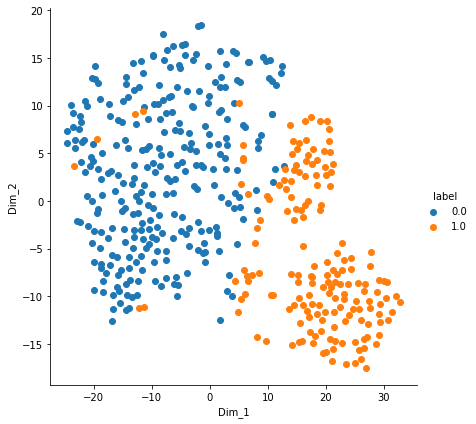

In [31]:
import seaborn as sns
tsne_data = np.vstack((X_tsne.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Plotting the result of t-SNE
sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()